In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = pd.DataFrame({'x_train': [200, 134],
                          'y_train': [450, 390]
                         })
# x_tarin -> land in sq_feet
# y_train -> price in 1000$

In [3]:
train_set

,x_train,y_train
0,200,450
1,134,390


In [4]:
w = 100
b = 200

In [5]:
def calc_prediction(x,w,b):
    m = len(train_set)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i] + b
    return f_wb

In [6]:
prediction_set= calc_prediction(train_set['x_train'],w,b)

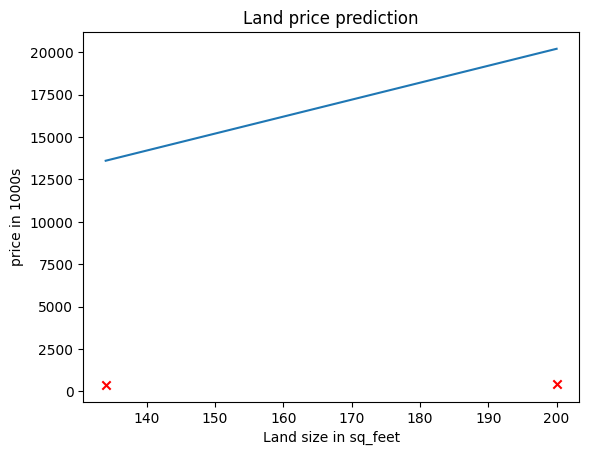

In [7]:
plt.plot(train_set['x_train'], prediction_set)
plt.scatter(train_set['x_train'], train_set['y_train'], marker = 'x', color='red')
plt.xlabel('Land size in sq_feet')
plt.ylabel('price in 1000s')
plt.title('Land price prediction')

plt.show()

In [8]:
# as seen in the plot above the prediction_set doesnot match our train_set

# Regression model
#### <u>Linear regression</u>
$$\textrm{Model}: f_w,_b(x)= wx + b $$
$$\textrm{here, w and b are parameters}$$

$$\hat{y}^{(i)}= f_{w,b}(x^{(i)}) = wx^{(i)}+b $$

- parameters are the variable that we can adjust while training to improve the model
- these prameters are sometimes called as Coefficient or weight
- the $ f_{w,b}(x) $ is also written as $ f(x) $ or $\hat{y}$
- $x^{(i)}$ and $y^{(i)}$ are the data points for input and output label where $ i = 0, 1, 2, 3,....... $
- $\hat{y}^{(i)}$ is the prediction point of $i^{th}$ index

> The challenge is to choose the $ w $ and $ b $ such that the prediction $ \hat{y} $ is close to the $ y $

#### <u>Cost function: Squared error cost function</u>
$$ J(w,b)=\frac{1}{2m} \sum_{i=1}^{m}{(f_{w,b}(x^{(i)}) - y^{(i)})^2}$$

- each data points of prediction is subtraced by target set and squared
- the division by $m$ or $2m$ doesnot make difference, but $2m$ makes the values cleaner to read
- if not divided by $m$ or $2m$ the cost function gets bigger as the size of dataset increases
- $(\hat{y}^{(i)} - y^{(i)})$ is the error and is squared to put heigher weight on larger errors
> We've seen Model, parameters and cost function. The goal of this is to minimize the cost function:
$$\underset{w,b}{minimize} {J(w,b)}$$

<b> NOTE:</b> as the value of $w$ and $b$ is changed it can form diffrent lines. The line that passes across the data has $J(w,b)$ minimum

# Gradient Descent Algorithm
- The algorithm is used to find the values of parameters by which $ J(w,b) $ is minumum
- Infact, the algorithm is used to find the minimum of $ J $ for $n$ number of parameter

$$\underset{w_1, w_2, .... w_n , b} {minimize} J(w_1, w_2, .... w_n , b) $$

- It is applicable for linear or any other functions

- Only the squared error cost function (cost function for linear regression) derives the bowl(2D plot) or hammock(3D plot) shape, meaning single minimum point is available.

- But for other complex functions it could have multiple minimum points.

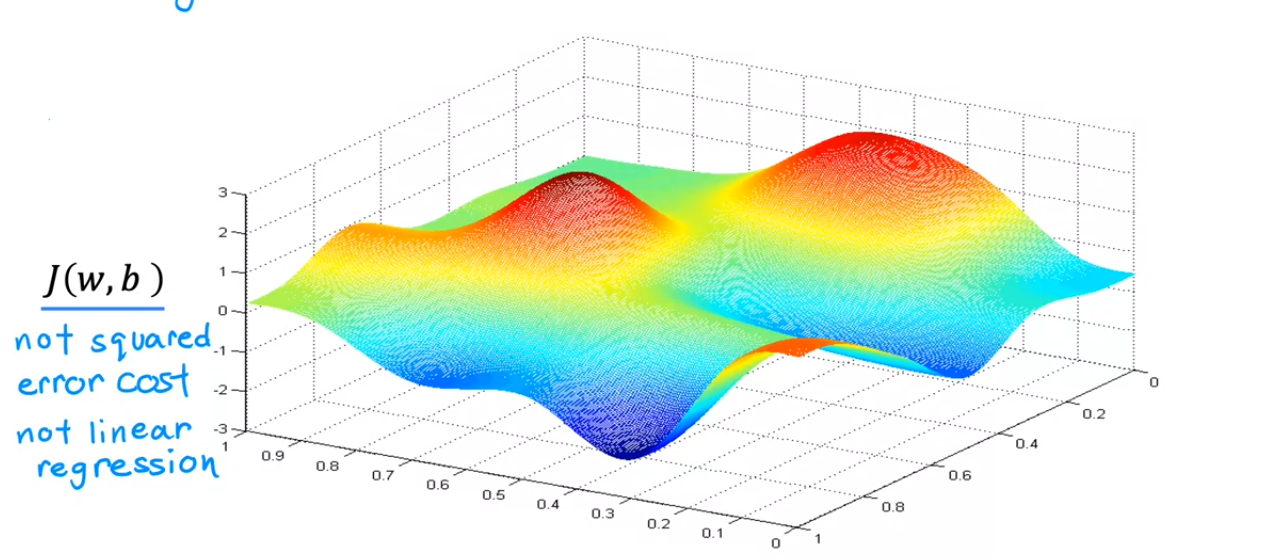

- The image has multiple minimum and maximum points. Thus is not a squared error cost function or linear regression model
- The squared error cost function is a convex function meaning that it forms a bowl shaped parabola with single global minimum.

### <u>Implementation</u>
$$ w = w - \alpha \frac{\partial}{\partial w} J(w,b)\tag{1} $$
$$b = b - \alpha \frac{\partial}{\partial b} J(w,b) \tag{2}$$
$$\textrm{while implementing Gradient Descent we update parameters (here, w and b) simultaneously}$$

- here $\alpha$ is learning rate, which is small value between $0$ and $1$ that we use as small steps towards local minima.
- $\alpha$ controls how bigger the step we take to update the parameters
#### <u>what simultaneous update is:</u>
- Don't overthink, 
- when we calculate new value for w, it actually subtracts small fraction of $\alpha$ and partial derivation of cost function w.r.t $w$
- after calculation of $w$ we must calculate for other parameters before actually updating the $w$

#### Learning rate $(\alpha)$ :
- The learning rate is how bigger steps we take to update the parameters.
- Generally it is a small positive number (i.e in between 0 and 1).
- <u>what if $\alpha$ is too small</u>:
  - it would take a lot of time to reach minimum value of $J(w_1,w_2, .... w_n, n)$
- <u>what if $\alpha$ is too large</u>:
  - it would cause the gradient descent to take larger steps to search for minimum of $J$
  - i.e it may diverge (may not be able to reach minimum rather goes towards larger values of $J$)
  - The goal is to repeate the gradient descent unitl $J$ is minimum, say until convergance

> <b>NOTE</b>: It is not necessary to choose variable $\alpha$ (fixed value is used) as the gradient descent automatically takes larger steps towards minimum of $J$ if the slope if larger. (i.e becaues we perform derivative of parameter and multiply by learning rate). As we move towards minimum the slope decreases resulting gradient descent to take smaller steps.
> - The slope at minimum (while w = 0) is zero.
> - on reaching minimum applying more gradient descent has no effect as the slope is 0, $w$ never changes
> - i.e if $\frac{d}{dw} J(w) = 0$ then it leads to $w=w - \alpha \textrm{x}0 \implies w = w - 0 \implies w = w$ 

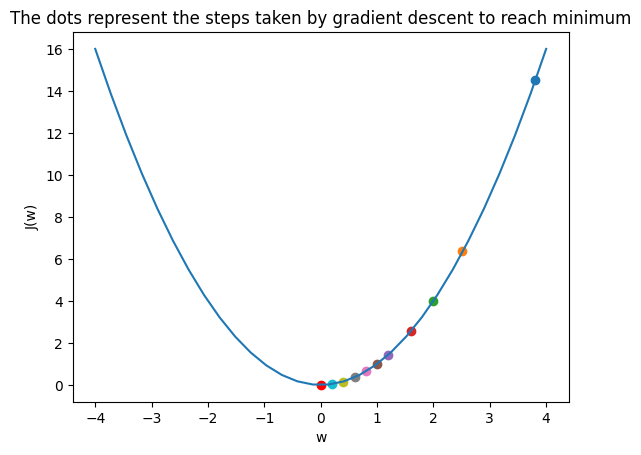 

#### <u>From $(1)$ and $(2)$</u>


$$ Repeate\ until\ convergence \{ $$
$$ w = w - \alpha \frac{1}{m}\sum_{i=1}^{m}{(f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)}}$$
$$ b = b - \alpha \frac{1}{m}\sum_{i=1}^{m}{(f_{w,b}(x^{(i)}) - y^{(i)})}$$
$$\}$$

### Batch Gradient descent
- The term "batch" is used if we apply gradient descent to all the data point of size m.
- There are other gradient descent approaches where we do not use all the data points rather we select a subset of the data set to apply gradient descent on.

In [9]:
df = pd.DataFrame({'x_train': [20,45,67,55,80],
                    'y_train': [100, 400, 500, 520, 900 ]
                  })
x = df['x_train']
y = df['y_train']

In [10]:
def prediction(x,y, w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i] + b
    return f_wb


In [11]:
# calculating f(x) with random w and b
y_hat = prediction(x,y, 100, 200)

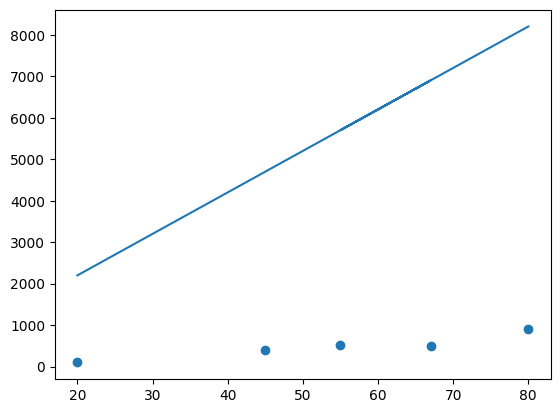

In [12]:
plt.scatter(x,y)
plt.plot(x,y_hat);